# Lesson 3: Simulation of Complex Quantum Systems

One of the most promising applications of quantum computers is simulating quantum systems that are hard to simulate classically. This includes the time evolution of states under certain Hamiltonians, simulating molecular energies, and modeling realistic quantum operations (including noise).

In this lesson, we will:

Simulate Time Evolution Under a Hamiltonian
Explore Quantum Chemistry with Qiskit Nature
Discuss Noise and Realistic Conditions
We’ll do so primarily using Qiskit Terra’s core functionality and qiskit-nature.

## 3.1 Simulating Time Evolution Under a Hamiltonian


A Hamiltonian $H$ represents the total energy of a quantum system. The system evolves in time according to the Schrödinger equation. The time evolution operator for a time-independent Hamiltonian is:
$$
U(t)=e^{-i H t}
$$
Key Points:
- We need to compute the matrix exponential of $-i H t$.
- We'll use scipy.linalg.expm for the matrix exponential, since numpy.linalg doesn't have expm.
- We'll represent states using Statevector from qiskit.quantum_info, and we'll apply Operator objects to evolve those states.

Example: Consider a single qubit with a Hamiltonian $H=\omega Z$, where $Z$ is the Pauli-Z matrix.

/mnt/c/Users/jacob/Documentos (Escritorio)/GitHub/quantum-computing/qiskit-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9001 (\N{LEFT-POINTING ANGLE BRACKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/mnt/c/Users/jacob/Documentos (Escritorio)/GitHub/quantum-computing/qiskit-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9002 (\N{RIGHT-POINTING ANGLE BRACKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


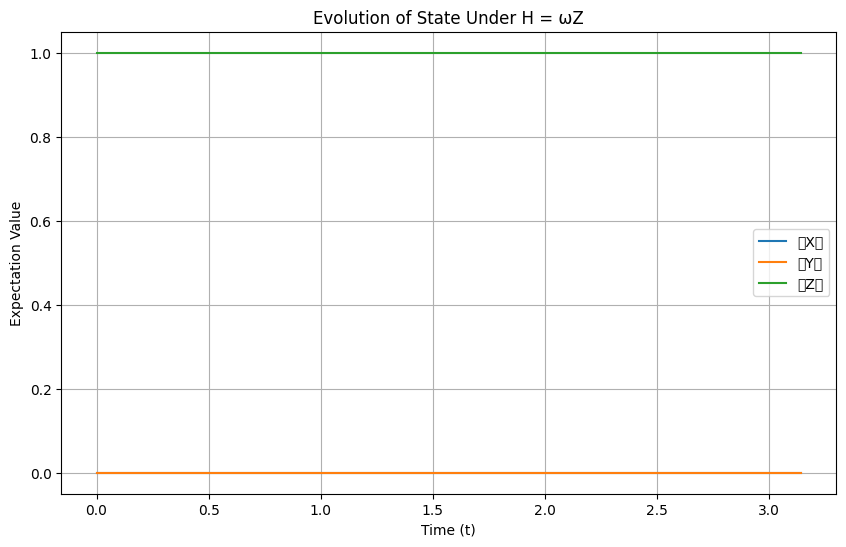

In [1]:
import numpy as np
from scipy.linalg import expm
from qiskit.quantum_info import Statevector, Operator, Pauli
import matplotlib.pyplot as plt

# Define the Hamiltonian H = ωZ
omega = 1.0
Z = np.array([[1, 0],
              [0,-1]])
H = omega * Z

def time_evolution_operator(H, t):
    return expm(-1j * H * t)

# Initial state |0>
initial_state = Statevector.from_label('0')

# Define a range of times to observe the evolution
times = np.linspace(0, np.pi, 50)  # from 0 to π, 50 points

# Pauli operators for expectation values
X_op = Pauli('X').to_matrix()
Y_op = Pauli('Y').to_matrix()
Z_op = Pauli('Z').to_matrix()

# Lists to store expectation values
exp_X = []
exp_Y = []
exp_Z = []

for t in times:
    U = time_evolution_operator(H, t)
    U_op = Operator(U)
    final_state = initial_state.evolve(U_op)
    
    # Calculate expectation values
    # <ψ|X|ψ>, <ψ|Y|ψ>, <ψ|Z|ψ>
    state_vec = final_state.data
    exp_X.append(np.real(state_vec.conjugate().T @ X_op @ state_vec))
    exp_Y.append(np.real(state_vec.conjugate().T @ Y_op @ state_vec))
    exp_Z.append(np.real(state_vec.conjugate().T @ Z_op @ state_vec))

# Plot the expectation values over time
plt.figure(figsize=(10,6))
plt.plot(times, exp_X, label='〈X〉')
plt.plot(times, exp_Y, label='〈Y〉')
plt.plot(times, exp_Z, label='〈Z〉')

plt.title("Evolution of State Under H = ωZ")
plt.xlabel("Time (t)")
plt.ylabel("Expectation Value")
plt.grid(True)
plt.legend()
plt.show()

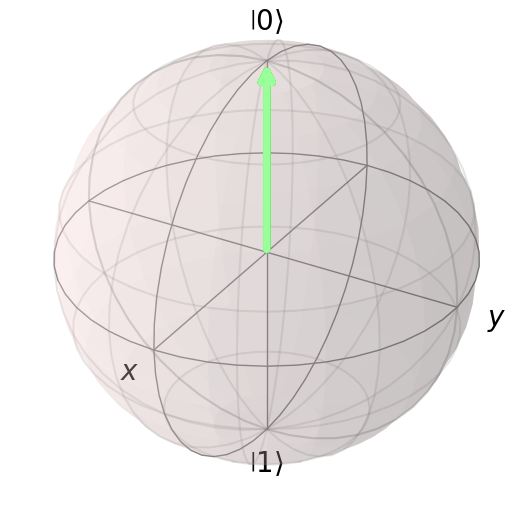

In [2]:
import numpy as np
from scipy.linalg import expm
from qiskit.quantum_info import Statevector, Pauli
from qiskit.visualization.bloch import Bloch
import matplotlib.pyplot as plt

# Definir el Hamiltoniano H = ωZ
omega = 1.0
Z = np.array([[1, 0],
              [0, -1]])
H = omega * Z

def time_evolution_operator(H, t):
    return expm(-1j * H * t)

# Estado inicial |+>
initial_state = Statevector.from_label('0')

N = 10
times = np.linspace(0, np.pi, N)

X_op = Pauli('X').to_matrix()
Y_op = Pauli('Y').to_matrix()
Z_op = Pauli('Z').to_matrix()

# Ajustes de color:
# Verde oscuro al inicio, verde claro al final (sin transparencia)
start_color = np.array([0.0, 0.8, 0.0, 1.0]) # RGBA inicio
end_color   = np.array([0.6, 1.0, 0.6, 1.0]) # RGBA final

vectors = []
colors = []

for i, t in enumerate(times):
    U = time_evolution_operator(H, t)
    final_state = initial_state.evolve(U)
    state_vec = final_state.data

    # Valores esperados
    expX = np.real(state_vec.conjugate().T @ X_op @ state_vec)
    expY = np.real(state_vec.conjugate().T @ Y_op @ state_vec)
    expZ = np.real(state_vec.conjugate().T @ Z_op @ state_vec)
    
    # Cada vector es [expX, expY, expZ]
    vectors.append([expX, expY, expZ])
    
    # Interpolamos el color
    factor = i/(N-1) if N > 1 else 0
    color = start_color * (1 - factor) + end_color * factor
    color = tuple(color)
    colors.append(color)

# Crear la esfera de Bloch
bloch = Bloch()
bloch.title = "State Evolution Under H = ωZ"
bloch.background_color = 'white'

# Quitar ejes estándar
bloch.xaxis = []
bloch.yaxis = []
bloch.zaxis = []

# Asignar todos los vectores y colores de una sola vez
bloch.vectors = vectors
bloch.vector_color = colors

bloch.show()


If the initial state is the uniform superposition:

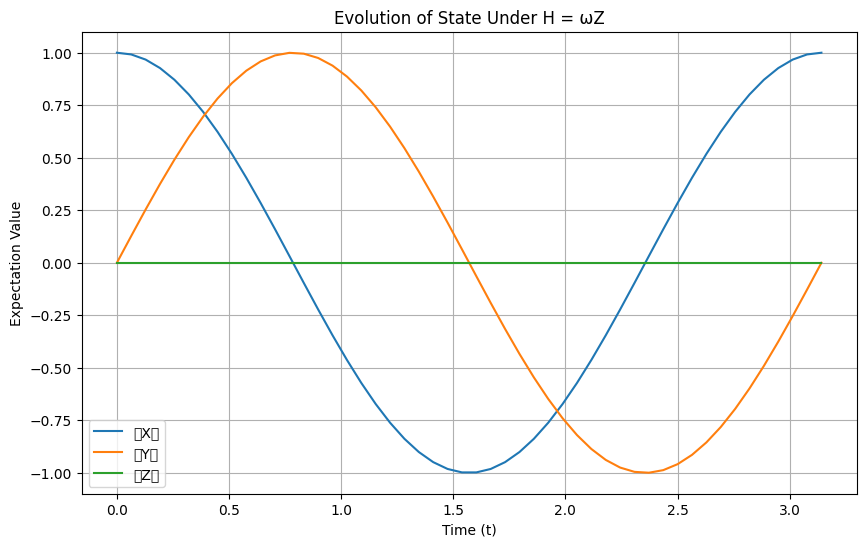

In [3]:
import numpy as np
from scipy.linalg import expm
from qiskit.quantum_info import Statevector, Operator, Pauli
import matplotlib.pyplot as plt

# Define the Hamiltonian H = ωZ
omega = 1.0
Z = np.array([[1, 0],
              [0,-1]])
H = omega * Z

def time_evolution_operator(H, t):
    return expm(-1j * H * t)

# Initial state |0>
initial_state = Statevector.from_label('+')

# Define a range of times to observe the evolution
times = np.linspace(0, np.pi, 50)  # from 0 to π, 50 points

# Pauli operators for expectation values
X_op = Pauli('X').to_matrix()
Y_op = Pauli('Y').to_matrix()
Z_op = Pauli('Z').to_matrix()

# Lists to store expectation values
exp_X = []
exp_Y = []
exp_Z = []

for t in times:
    U = time_evolution_operator(H, t)
    U_op = Operator(U)
    final_state = initial_state.evolve(U_op)
    
    # Calculate expectation values
    # <ψ|X|ψ>, <ψ|Y|ψ>, <ψ|Z|ψ>
    state_vec = final_state.data
    exp_X.append(np.real(state_vec.conjugate().T @ X_op @ state_vec))
    exp_Y.append(np.real(state_vec.conjugate().T @ Y_op @ state_vec))
    exp_Z.append(np.real(state_vec.conjugate().T @ Z_op @ state_vec))

# Plot the expectation values over time
plt.figure(figsize=(10,6))
plt.plot(times, exp_X, label='〈X〉')
plt.plot(times, exp_Y, label='〈Y〉')
plt.plot(times, exp_Z, label='〈Z〉')

plt.title("Evolution of State Under H = ωZ")
plt.xlabel("Time (t)")
plt.ylabel("Expectation Value")
plt.grid(True)
plt.legend()
plt.show()


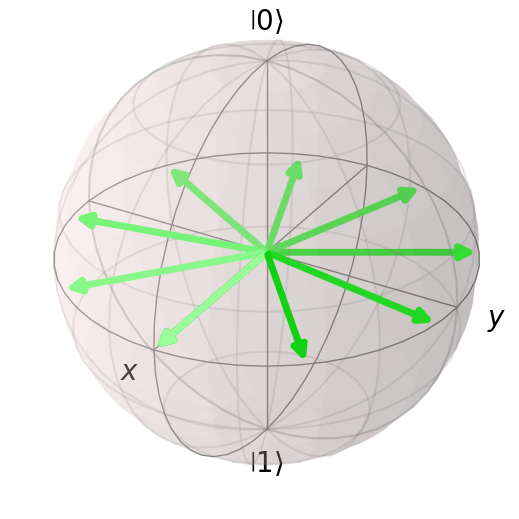

In [ ]:
import numpy as np
from scipy.linalg import expm
from qiskit.quantum_info import Statevector, Pauli
from qiskit.visualization.bloch import Bloch
import matplotlib.pyplot as plt

# Definir el Hamiltoniano H = ωZ
omega = 1.0
Z = np.array([[1, 0],
              [0, -1]])
H = omega * Z

def time_evolution_operator(H, t):
    return expm(-1j * H * t)

# Estado inicial |+>
initial_state = Statevector.from_label('+')

N = 10
times = np.linspace(0, np.pi, N)

X_op = Pauli('X').to_matrix()
Y_op = Pauli('Y').to_matrix()
Z_op = Pauli('Z').to_matrix()

# Ajustes de color:
# Verde oscuro al inicio, verde claro al final (sin transparencia)
start_color = np.array([0.0, 0.8, 0.0, 1.0]) # RGBA inicio
end_color   = np.array([0.6, 1.0, 0.6, 1.0]) # RGBA final

vectors = []
colors = []

for i, t in enumerate(times):
    U = time_evolution_operator(H, t)
    final_state = initial_state.evolve(U)
    state_vec = final_state.data

    # Valores esperados
    expX = np.real(state_vec.conjugate().T @ X_op @ state_vec)
    expY = np.real(state_vec.conjugate().T @ Y_op @ state_vec)
    expZ = np.real(state_vec.conjugate().T @ Z_op @ state_vec)
    
    # Cada vector es [expX, expY, expZ]
    vectors.append([expX, expY, expZ])
    
    # Interpolamos el color
    factor = i/(N-1) if N > 1 else 0
    color = start_color * (1 - factor) + end_color * factor
    color = tuple(color)
    colors.append(color)

# Crear la esfera de Bloch
bloch = Bloch()
bloch.title = "State Evolution Under H = ωZ"
bloch.background_color = 'white'

# Quitar ejes estándar
bloch.xaxis = []
bloch.yaxis = []
bloch.zaxis = []

# Asignar todos los vectores y colores de una sola vez
bloch.vectors = vectors
bloch.vector_color = colors

bloch.show()


## 3.2 Modeling Quantum Phenomena in Chemistry with Qiskit Nature

What Qiskit Nature Provides:
- Integration with classical quantum chemistry packages (e.g., PySCF) to generate electronic integrals.
- Tools to transform these integrals into second-quantized Hamiltonians.
- Mappers to convert fermionic problems into qubit Hamiltonians suitable for quantum algorithms.
- Access to algorithms like VQE (Variational Quantum Eigensolver) to approximate ground-state and excited-state energies of molecular systems.

Workflow Overview
1. Define the Molecule: Use a classical driver (like PySCFDriver) to obtain molecular integrals.
2. Electronic Structure Problem: Convert these integrals into a problem suitable for quantum algorithms.
3. Active Space and Mappers: Restrict to an active space and map the fermionic operators to qubit operators (e.g., using ParityMapper).
4. VQE Algorithm: Set up a VQE instance with an ansatz (e.g., UCCSD), a suitable optimizer, and possibly a simulator or quantum backend to run it.
5. Results and Interpretation: Obtain the ground-state energy estimate and compare it to known values. This process can help validate the approach and provide insights into more complex molecules.

In [1]:
import numpy as np
import pylab

from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.formats import MoleculeInfo
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

from qiskit_algorithms import NumPyMinimumEigensolver

In [4]:
def compute_energies(basis, distances):
    energies = []
    
    for d in distances:
        info = MoleculeInfo(["H", "H"], [(0.0, 0.0, 0.0), (0.0, 0.0, d)])
        driver = PySCFDriver.from_molecule(info, basis=basis)
        molecule = driver.run()
        mapper = JordanWignerMapper()
        
        algo = NumPyMinimumEigensolver()
        algo.filter_criterion = molecule.get_default_filter_criterion()
        solver = GroundStateEigensolver(mapper, algo)
        result = solver.solve(molecule)
        energies.append(result.total_energies[0])
    
    return energies

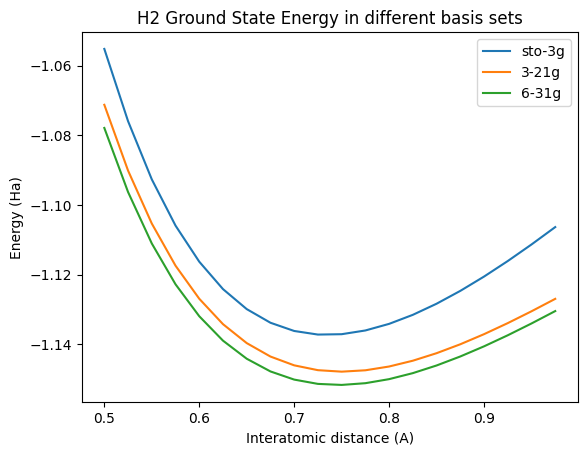

In [5]:
basis_sets = ['sto-3g', '3-21g', '6-31g']
distances  = [0.5 + 0.025*x  for x in range(0, 20)]

for b in basis_sets:
    pylab.plot(distances, compute_energies(b, distances), label=b)
    
pylab.xlabel('Interatomic distance (A)')
pylab.ylabel('Energy (Ha)')
pylab.title('H2 Ground State Energy in different basis sets')
pylab.legend(loc='upper right')